In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
digits = datasets.load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [3]:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
# Support vector machine linear classifier
from sklearn.ensemble import RandomForestClassifier

Z:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
# Create a nested for-loop to test different model parameters. 
# For the n_estimators parameter, use the list of settings [10, 100, 100].
# For the max_depth parameter, use the list of settings [2, 5, 10, 20]

best_score = 0
best_parameters = {}
for n_estimators in [10,100,1000]:
    for max_depth in [2,5,10,20]:
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        print(f'n_estimators={n_estimators}, max_depth={max_depth}, score: {score}')
        if score > best_score:
            best_score = score
            best_parameters = {'n_estimators': n_estimators, 'max_depth': max_depth}
            best_model = model
print('-----------------------------------------------------------------------------')            
print(f'The best parameters are {best_parameters} with a test score of {best_score}')

n_estimators=10, max_depth=2, score: 0.6822222222222222
n_estimators=10, max_depth=5, score: 0.9
n_estimators=10, max_depth=10, score: 0.9155555555555556
n_estimators=10, max_depth=20, score: 0.9377777777777778
n_estimators=100, max_depth=2, score: 0.7822222222222223
n_estimators=100, max_depth=5, score: 0.9244444444444444
n_estimators=100, max_depth=10, score: 0.9711111111111111
n_estimators=100, max_depth=20, score: 0.9688888888888889
n_estimators=1000, max_depth=2, score: 0.8
n_estimators=1000, max_depth=5, score: 0.9355555555555556
n_estimators=1000, max_depth=10, score: 0.9777777777777777
n_estimators=1000, max_depth=20, score: 0.9822222222222222
-----------------------------------------------------------------------------
The best parameters are {'n_estimators': 1000, 'max_depth': 20} with a test score of 0.9822222222222222


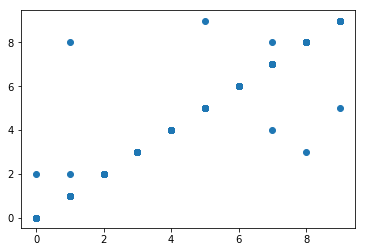

In [6]:
# Plot a scatterplot of predictions on X_test vs actual y_test values
predictions = best_model.predict(X_test)
plt.scatter(predictions, y_test)

In [7]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

             precision    recall  f1-score   support

       blue       0.97      1.00      0.99        37
        red       0.96      1.00      0.98        43

avg / total       0.98      0.98      0.98       450



Z:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 10, does not match size of target_names, 2
  .format(len(labels), len(target_names))
